# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import os

#filepath = "../api_keys"
# Import API key
from api_keys import open_weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#define base and query URL
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={open_weather_key}&q={cities[0]}&units={units}"

#get response
response = requests.get(query_url).json()

#print response and analyze format
response


{'coord': {'lon': -113.58, 'lat': 37.1},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 46.56,
  'feels_like': 43.43,
  'temp_min': 37,
  'temp_max': 48.99,
  'pressure': 1013,
  'humidity': 93},
 'visibility': 16093,
 'wind': {'speed': 3.36, 'deg': 20},
 'rain': {'1h': 0.25},
 'clouds': {'all': 90},
 'dt': 1584157038,
 'sys': {'type': 1,
  'id': 5832,
  'country': 'US',
  'sunrise': 1584107247,
  'sunset': 1584149996},
 'timezone': -21600,
 'id': 5546220,
 'name': 'Saint George',
 'cod': 200}

In [4]:
#create summary dict
data = {"City": [],
       "Cloudiness": [],
       "Country": [],
       "Date": [],
       "Humidity": [],
       "Lat": [],
       "Lng": [],
       "Max Temp": [],
       "Wind Speed": []}

#set counts for print statment in loop
number = 0
sets = 1

#loop through cities in list
for item in cities:
    try:
        #redefine query_url and response for each city in the loop
        query_url = f"{url}appid={open_weather_key}&q={item}&units={units}"
        response = requests.get(query_url).json()
        #update print statement count and print
        number = number + 1
        print(f"Processing Record {number} of Set {sets} | {item}")
        #append summary dict with appropriate data
        data["City"].append(response['name'])
        data["Cloudiness"].append(response['clouds']['all'])
        data["Country"].append(response['sys']['country'])
        data["Date"].append(response['dt'])
        data["Humidity"].append(response['main']['humidity'])
        data["Lat"].append(response['coord']['lat'])
        data["Lng"].append(response['coord']['lon'])
        data["Max Temp"].append(response['main']['temp_max'])
        data["Wind Speed"].append(response['wind']['speed'])
    #create exception
    except:
        print("City not found. Skipping ...")
    #reset set counts after 50 records
    if number == 50:
        sets = sets+1
        number = 0
    #limit API requests
    time.sleep(1)

Processing Record 1 of Set 1 | saint george
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | muros
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | mendahara
City not found. Skipping ...
Processing Record 6 of Set 1 | lolua
City not found. Skipping ...
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | belushya guba
City not found. Skipping ...
Processing Record 10 of Set 1 | gaozhou
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | henties bay
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping ...
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | mahebourg
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | khandbari
Processing Record 19 of Set 1 | palencia
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | lebu
Processing Record 22

Processing Record 37 of Set 4 | luderitz
Processing Record 38 of Set 4 | manjacaze
Processing Record 39 of Set 4 | neuquen
Processing Record 40 of Set 4 | lavumisa
Processing Record 41 of Set 4 | mergui
City not found. Skipping ...
Processing Record 42 of Set 4 | sechura
Processing Record 43 of Set 4 | karratha
Processing Record 44 of Set 4 | umzimvubu
City not found. Skipping ...
Processing Record 45 of Set 4 | tsihombe
City not found. Skipping ...
Processing Record 46 of Set 4 | hanzhong
Processing Record 47 of Set 4 | qandala
Processing Record 48 of Set 4 | hays
Processing Record 49 of Set 4 | pokhara
Processing Record 50 of Set 4 | batemans bay
Processing Record 1 of Set 5 | vestmannaeyjar
Processing Record 2 of Set 5 | assomada
Processing Record 3 of Set 5 | matadi
Processing Record 4 of Set 5 | bhandara
Processing Record 5 of Set 5 | thinadhoo
Processing Record 6 of Set 5 | paamiut
Processing Record 7 of Set 5 | nizhneyansk
City not found. Skipping ...
Processing Record 8 of Set 

Processing Record 26 of Set 8 | upernavik
Processing Record 27 of Set 8 | sao felix do xingu
Processing Record 28 of Set 8 | porto novo
Processing Record 29 of Set 8 | sur
Processing Record 30 of Set 8 | sioux lookout
Processing Record 31 of Set 8 | mount gambier
Processing Record 32 of Set 8 | anuradhapura
Processing Record 33 of Set 8 | donghai
Processing Record 34 of Set 8 | ilongero
Processing Record 35 of Set 8 | matelandia
Processing Record 36 of Set 8 | boguchany
Processing Record 37 of Set 8 | linqiong
Processing Record 38 of Set 8 | sovetskiy
Processing Record 39 of Set 8 | maldonado
Processing Record 40 of Set 8 | dickson
Processing Record 41 of Set 8 | timbakion
City not found. Skipping ...
Processing Record 42 of Set 8 | bourail
Processing Record 43 of Set 8 | tarakan
Processing Record 44 of Set 8 | kiruna
Processing Record 45 of Set 8 | ugoofaaru
Processing Record 46 of Set 8 | coihaique
Processing Record 47 of Set 8 | cherskiy
Processing Record 48 of Set 8 | nador
Process

Processing Record 15 of Set 12 | doctor pedro p. pena
City not found. Skipping ...
Processing Record 16 of Set 12 | dahuk
Processing Record 17 of Set 12 | bol
Processing Record 18 of Set 12 | cedar lake
Processing Record 19 of Set 12 | takoradi
Processing Record 20 of Set 12 | mount pleasant
Processing Record 21 of Set 12 | bijbiara
Processing Record 22 of Set 12 | ruatoria
City not found. Skipping ...
Processing Record 23 of Set 12 | matay
Processing Record 24 of Set 12 | lephepe
City not found. Skipping ...
Processing Record 25 of Set 12 | kiama
Processing Record 26 of Set 12 | the valley
Processing Record 27 of Set 12 | robertsport
Processing Record 28 of Set 12 | pala
Processing Record 29 of Set 12 | aguas vermelhas
Processing Record 30 of Set 12 | vaxjo
Processing Record 31 of Set 12 | storforshei
Processing Record 32 of Set 12 | san francisco
Processing Record 33 of Set 12 | salvacion
Processing Record 34 of Set 12 | islahiye
Processing Record 35 of Set 12 | codrington
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#convert summary dict to dataframe and display
city_data_df = pd.DataFrame(data)
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint George,90,US,1584157038,93,37.10,-113.58,48.99,3.36
1,Cape Town,75,ZA,1584156472,93,-33.93,18.42,60.01,8.05
2,Muros,33,ES,1584157163,93,42.78,-9.06,46.00,3.36
3,Albany,20,US,1584156902,52,42.60,-73.97,42.01,11.41
4,Jamestown,1,US,1584157168,59,42.10,-79.24,37.00,11.41
...,...,...,...,...,...,...,...,...,...
538,Codrington,80,AU,1584157804,67,-38.27,141.97,56.73,17.20
539,Solnechnyy,100,RU,1584157805,86,50.72,136.63,12.43,4.21
540,Oussouye,0,SN,1584157806,50,12.48,-16.55,78.80,6.93
541,Hukay,42,PH,1584157808,69,13.85,120.70,82.00,3.96


In [7]:
#export dataframe to CSV file
city_data_df.to_csv("../Output/city_data.csv",
                  encoding="utf-8", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

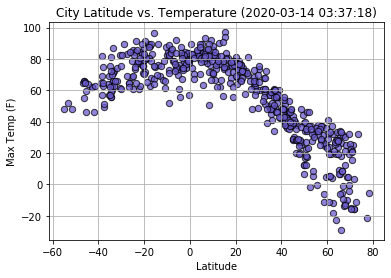

In [9]:
#defines variable to plot
max_temp = city_data_df["Max Temp"]
latitude = city_data_df["Lat"]
#set date
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'],unit='s')
date = city_data_df["Date"][0]
#create plot
plt.scatter(latitude, max_temp, s=40, c="slateblue", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(b=None, which='major', axis='both')
plt.savefig("LatTempPlot.png")
plt.show()

#### Latitude vs. Humidity Plot

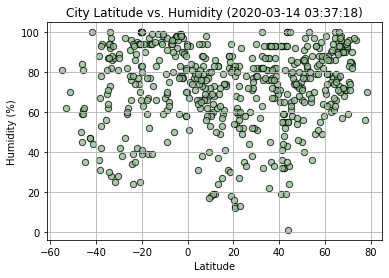

In [10]:
#defines variable to plot
humidity = city_data_df["Humidity"]
#create plot
plt.scatter(latitude, humidity, s=40, c="darkseagreen", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=None, which='major', axis='both')
plt.savefig("LatHumidPlot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

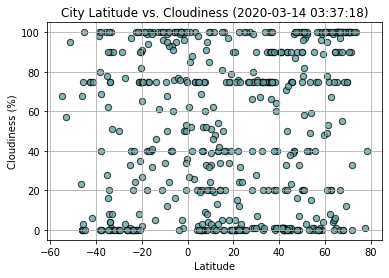

In [11]:
#defines variable to plot
cloudiness = city_data_df["Cloudiness"]
#create plot
plt.scatter(latitude, cloudiness, s=40, c="cadetblue", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=None, which='major', axis='both')
plt.savefig("LatCloudPlot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

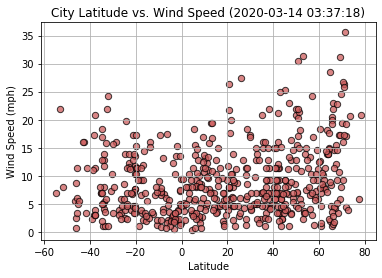

In [12]:
#defines variable to plot
wind_speed = city_data_df["Wind Speed"]
#create plot
plt.scatter(latitude, wind_speed, s=40, c="indianred", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=None, which='major', axis='both')
plt.savefig("LatWindPlot.png")

## Linear Regression

In [23]:
# OPTIONAL: Create a function to create Linear Regression plots
'''
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
'''

def lin_reg(x_axis, y_axis):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_axis, regress_values, "black")
    plt.show
    return print(f"The value of r-squared is {rvalue**2}."), print(f"The line equation is: {line_eq}.")



In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_df = city_data_df.loc[city_data_df["Lat"] < 0]

northern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint George,90,US,2020-03-14 03:37:18,93,37.10,-113.58,48.99,3.36
2,Muros,33,ES,2020-03-14 03:39:23,93,42.78,-9.06,46.00,3.36
3,Albany,20,US,2020-03-14 03:35:02,52,42.60,-73.97,42.01,11.41
4,Jamestown,1,US,2020-03-14 03:39:28,59,42.10,-79.24,37.00,11.41
5,George Town,20,MY,2020-03-14 03:35:17,62,5.41,100.34,89.60,3.36
...,...,...,...,...,...,...,...,...,...
537,İslahiye,75,TR,2020-03-14 03:50:03,67,37.02,36.63,60.01,11.41
539,Solnechnyy,100,RU,2020-03-14 03:50:05,86,50.72,136.63,12.43,4.21
540,Oussouye,0,SN,2020-03-14 03:50:06,50,12.48,-16.55,78.80,6.93
541,Hukay,42,PH,2020-03-14 03:50:08,69,13.85,120.70,82.00,3.96


In [16]:
southern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Cape Town,75,ZA,2020-03-14 03:27:52,93,-33.93,18.42,60.01,8.05
7,Mataura,0,NZ,2020-03-14 03:39:32,59,-46.19,168.86,66.07,0.74
8,Henties Bay,0,NA,2020-03-14 03:39:33,95,-22.12,14.28,61.00,3.87
9,Bredasdorp,8,ZA,2020-03-14 03:39:34,87,-34.53,20.04,55.40,1.12
10,Atuona,34,PF,2020-03-14 03:39:36,67,-9.80,-139.03,82.80,9.15
...,...,...,...,...,...,...,...,...,...
513,Bethanien,0,NA,2020-03-14 03:49:34,60,-26.50,17.16,62.11,2.39
515,Caraz,95,PE,2020-03-14 03:49:36,91,-9.05,-77.81,51.80,2.10
528,Kiama,90,AU,2020-03-14 03:49:53,71,-34.68,150.87,57.20,6.93
532,Águas Vermelhas,41,BR,2020-03-14 03:49:58,99,-15.75,-41.46,64.04,2.86


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The value of r-squared is 0.8282114036742889.
The line equation is: y = -1.21x + 93.0.


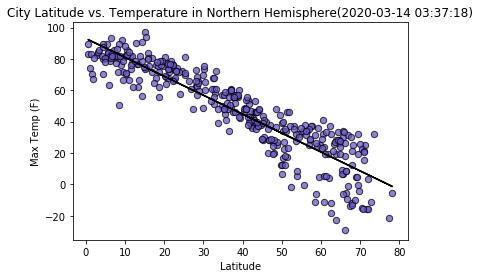

In [25]:
#defines variable to plot
n_max_temp = northern_df["Max Temp"]
n_latitude = northern_df["Lat"]

#create plot
plt.scatter(n_latitude, n_max_temp, s=40, c="slateblue", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Temperature in Northern Hemisphere({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
lin_reg(n_latitude, n_max_temp)
plt.savefig("NorthLatTempLinearPlot.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The value of r-squared is 0.2764309638736738.
The line equation is: y = 0.41x + 81.83.


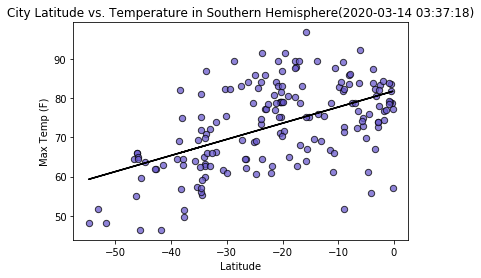

In [26]:
#defines variable to plot
s_max_temp = southern_df["Max Temp"]
s_latitude = southern_df["Lat"]

#create plot
plt.scatter(s_latitude, s_max_temp, s=40, c="slateblue", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Temperature in Southern Hemisphere({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
lin_reg(s_latitude, s_max_temp)
plt.savefig("SouthLatTempLinearPlot.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The value of r-squared is 0.06595054773642021.
The line equation is: y = 0.24x + 61.58.


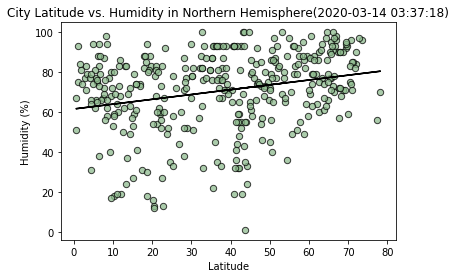

In [27]:
#defines variable to plot
n_humidity = northern_df["Humidity"]
#create plot
plt.scatter(n_latitude, n_humidity, s=40, c="darkseagreen", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Humidity in Northern Hemisphere({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
lin_reg(n_latitude, n_humidity)
plt.savefig("NorthLatHumidLinear.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The value of r-squared is 0.08901116521732395.
The line equation is: y = 0.45x + 85.09.


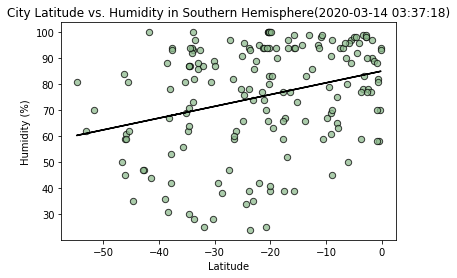

In [28]:
#defines variable to plot
s_humidity = southern_df["Humidity"]
#create plot
plt.scatter(s_latitude, s_humidity, s=40, c="darkseagreen", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Humidity in Southern Hemisphere({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
lin_reg(s_latitude, s_humidity)
plt.savefig("SouthLatHumidLinearPlot.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The value of r-squared is 0.07166594520267751.
The line equation is: y = 0.5x + 30.5.


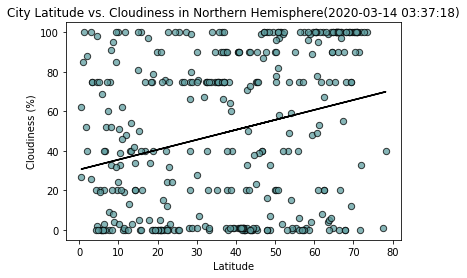

In [29]:
#defines variable to plot
n_cloudiness = northern_df["Cloudiness"]
#create plot
plt.scatter(n_latitude, n_cloudiness, s=40, c="cadetblue", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Cloudiness in Northern Hemisphere({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
lin_reg(n_latitude, n_cloudiness)
plt.savefig("NorthLatCloudLinearPlot.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The value of r-squared is 0.08846457721151042.
The line equation is: y = 0.85x + 72.55.


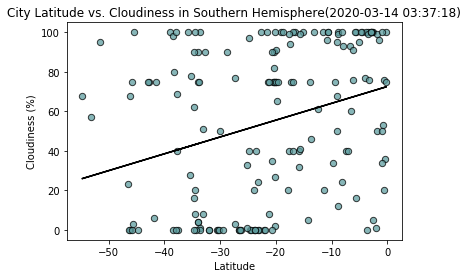

In [30]:
#defines variable to plot
s_cloudiness = southern_df["Cloudiness"]
#create plot
plt.scatter(s_latitude, s_cloudiness, s=40, c="cadetblue", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Cloudiness in Southern Hemisphere({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
lin_reg(s_latitude, s_cloudiness)
plt.savefig("SouthLatCloudLinearPlot.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The value of r-squared is 0.07102796798260133.
The line equation is: y = 0.08x + 6.58.


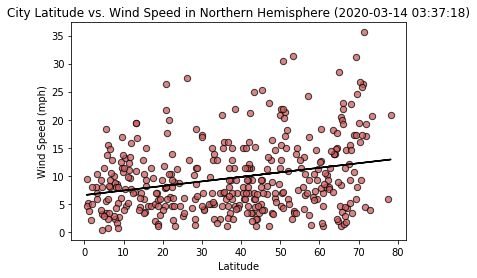

In [31]:
#defines variable to plot
n_wind_speed = northern_df["Wind Speed"]
#create plot
plt.scatter(n_latitude, n_wind_speed, s=40, c="indianred", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Wind Speed in Northern Hemisphere ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
lin_reg(n_latitude, n_wind_speed)
plt.savefig("NorthLatWindLinearPlot.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The value of r-squared is 0.048736456371187356.
The line equation is: y = -0.08x + 5.7.


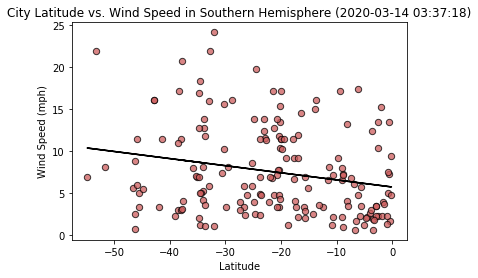

In [34]:
#defines variable to plot
s_wind_speed = southern_df["Wind Speed"]
#create plot
plt.scatter(s_latitude, s_wind_speed, s=40, c="indianred", edgecolors = "black", alpha = .75)
#set labels, titles, and other styling
plt.title(f"City Latitude vs. Wind Speed in Southern Hemisphere ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
#linear regression
lin_reg(s_latitude, s_wind_speed)
plt.savefig("SouthLatWindLinearPlot.png")